In [1]:
import sys
sys.path.append("..\..")

import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing import event_accumulator

In [2]:
def smooth_curve(values, smoothing=0.9):
    smoothed = []
    last = values[0]
    for v in values:
        last = last * smoothing + (1 - smoothing) * v
        smoothed.append(last)
    return smoothed

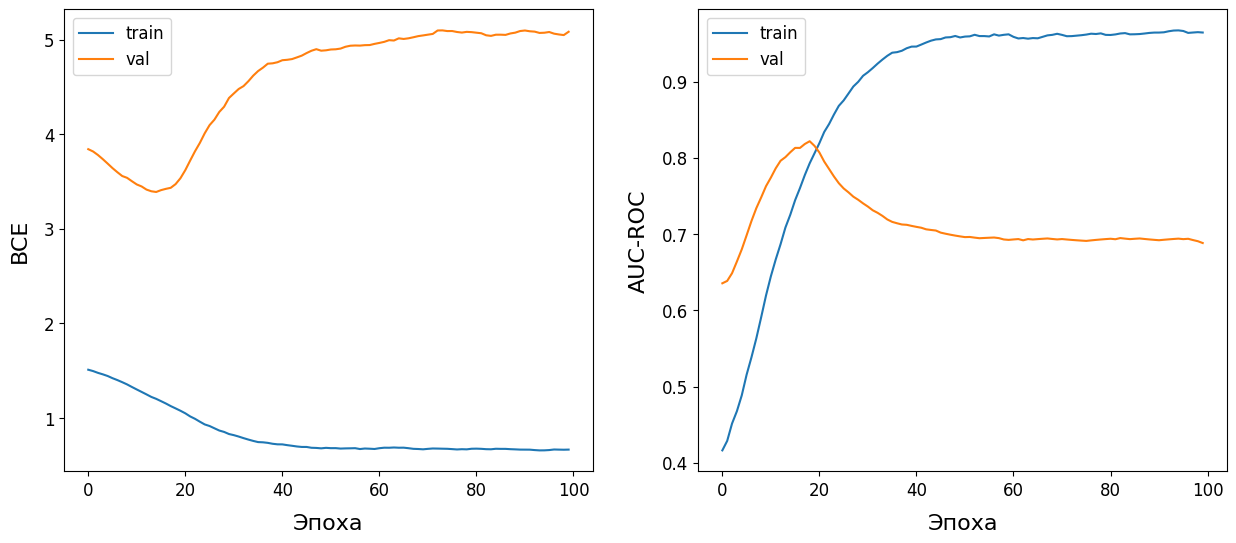

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ea = event_accumulator.EventAccumulator("..\\..\\src\\nn\\logs\\OverlapsNet\\version_0")
ea.Reload()

for loss in ['train_loss', 'val_loss']:
    loss_events = ea.Scalars(loss)

    values = [e.value for e in loss_events]
    smoothed_values = smooth_curve(values, smoothing=0.9)

    ax1.plot(np.arange(len(values)), smoothed_values, label=f"{loss.removesuffix('_loss')}")

ax1.set_xlabel("Эпоха", fontsize=16, labelpad=10)
ax1.set_ylabel("BCE", fontsize=16, labelpad=10)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=12)

for auroc in ['train_auroc', 'val_auroc']:
    auroc_events = ea.Scalars(auroc)

    values = [e.value for e in auroc_events]
    smoothed_values = smooth_curve(values, smoothing=0.9)

    ax2.plot(np.arange(len(values)), smoothed_values, label=f"{auroc.removesuffix('_auroc')}")

ax2.set_xlabel("Эпоха", fontsize=16, labelpad=10)
ax2.set_ylabel("AUC-ROC", fontsize=16, labelpad=10)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(fontsize=12)

plt.show()